## 1. Build the Prototype Model

&emsp;&emsp; The prototype economy that we use later in our accounting procedure is a stochastic RBC model. In each period $t$, the economy experiences one of finitely many events $s_t$, which index the shocks. We denote by  $s^t = (s_0, …, s_t)$ the history of events up through and including period $t$ and often refer to $s^t$ as the state. The probability, as of period 0, of any particular history $s^t$ is $π_t(s^t)$. The initial realization $s_0$ is given. The economy has four exogenous stochastic variables, all of which are functions of the underlying random variable $s^t$: the efficient wedge $A_t(s^t)$, the labor wedge $1- \pi_{lt}$, the investment wedge
$1/(1 +\tau_{xt})$ , and the government consumption wedge $g_t(s^t)$.

&emsp;&emsp;The representative consumer maximizes


  \begin{gather*}
  \max_{c_t(s^t),l_t(s^t)} \sum_{t=0}^\infty \sum_{s^t} \pi_t(s^t)\beta^t u(c_t(s^t),l_t(s^t))N_t \\
  c_t+[1+\tau_{xt}(s^t)]x_t(s^t)=[1-\tau_{lt}(s^t)]w_t(s^t)l_t(s^t)+r_t(s^t)k_t(s^{t-1})+T_t(s^t) \\
  (1+\gamma_n)(1+\gamma)k_{t+1}(s^t)=(1-\delta)k_t(s^{t-1})+x_t(s^t)
  \end{gather*}  
    where population growth rate equal to  $1 + γ_n$ and the rate of labor-augmenting technical progress is $1 + γ$. In addtion, $k_t,c_t,x_t,w_t$ are detrended per-capita variable

&emsp;&emsp;Firm optimization problem is 
$$\max_{k_t(s^{t-1}),l_t(s^t)} A_t(s^t)F(k_t(s^{t-1}),(1+\gamma)^tl_t(s^t)) - 
r_t(s^t)k_t(s^{t-1})-w_t(s^t)l_t(s^t) $$


&emsp;&emsp;The equilibrium of this prototype economy is summarized by the following equations 
\begin{align*}
y_t(s^t)&=A_t(s^t)F(k_t(s^{t-1}),(1+\gamma)^tl_t(s^t)) & \text{Production Technology}\\
    y_t(s^t)  & = c_t(s^t)+x_t(s^t)+g_t(s^t) & \text{Aggregate resource constraint}  \\ 
    - \frac{U_{lt}}{U_{ct}} &= (1-\tau_{lt})(1+\gamma)^tA_t F_{lt}  & \text{Consumption-Leisure Choice} \\
    U_{ct}(1+\tau_{xt}) &= \frac{\beta}{(1+\gamma_n)(1+\gamma)} \mathbb{E}_t [U_{ct+1}(A_{t+1}F_{kt+1} + (1-\delta )(1+\tau_{xt+1}))]&\text{Euler Equation }
\end{align*}
where the government runs a balanced budget $T_t = g_t - \tau_{xt}x_t - \tau_{lt}w_tl_t$.

For our quantitative results, we add investment adjustment costs by replacing the capital accumulation law with
$$(1+\gamma_n)k_{t+1}(s^t)=(1-\delta)k_t(s^{t-1})+x_t(s^t)-\phi\left(\frac{x_t(s^t)}{k_t(s^{t-1})}\right) k_t(s^{t-1})$$
where $\phi$ represents the per unit cost of adjusting the capital stock.We assume the adjustment costs are parameterized by the function
$$\phi\left(\frac xk\right)=\frac a2\left(\frac xk-b\right)^2$$

where $ b=\delta+\gamma+\gamma_n $ is the steady-state value of the investment-capital ratio.
## 2. Data Description 

 

## 2.1 Data Source
&emsp;&emsp;   The data employed for the business cycle accounting analysis in this paper predominantly originates from the OECD, with specific variable codes provided in parentheses. The analysis spans from 1980 to the end of 2014, unless mentioned otherwise, at the quarterly frequency. 

$-$ **Economic Outlook 98**
- GDP: Gross domestic product value, market prices 
- PGDP: GDP deflator, index 2009 
- ITISK: Gross capital formation, current prices 
- CG: Government final consumption expenditures, value, GDP expenditure approach
 - XGS: Exports of goods and services, value, national accounts basis 
 - MGS: Imports of goods and services, value, national accounts basis 
 - HRS: Hours worked per employee, total economy 
 - ET: Total employment 
-  CP: Private final consumption expenditure, value, GDP expenditure approach

$-$ **System of Quarterly National Accounts**
- nXCD: Durable goods (sub-category of CQRSA: private final consumption expenditure by durability, national currenc] current prices). 


$-$ **Tax on goods and services**
- $\tau_c$ : Taxes on goods and services as a share of GDP, annual (TAXGOODSERV, PCGDP) . Since the data are available at annual frequency and thus is interpolated to quarterly frequency using linear splines. 

$- $ **Population and Labor Force**

- iP: Population 15-64, persons, annual. since the data are available at annual frequency and thus is interpolated to quarterly frequency using cubic splines. 


In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Define the starting row for data (corresponding to 1980Q1 )
start_row = 82  
columns = {'GDP':4 , 'PGDP': 14, 'ITISK': 6, 'CG': 2, 'XGS': 8, 
    'MGS': 7, 'HRS': 18, 'ET': 17, 'CP': 3, 'nXCD':20 }

origin_data = pd.read_excel('USdata.xlsx', sheet_name='Economic Outlook',skiprows=4).iloc[82:-1,:]
data_series = pd.DataFrame()
for key, col in columns.items():
    data_series[key] = origin_data.iloc[:,col]
    
# Divide selected economic variables by 4 to adjust their scale (quarterly data assumed to be annualized)
data_series.loc[:,['GDP','ITISK','CG','XGS','MGS','HRS','CP']] = data_series.loc[:,['GDP','ITISK','CG','XGS','MGS','HRS','CP']] / 4
data_series.reset_index (drop= True,inplace=True)

# Collect residual errors from the aggregate resource constraint
aggcheck = data_series['GDP'] - (data_series['CP'] + data_series['ITISK'] + data_series['CG'] + data_series['XGS'] - data_series['MGS'])

# load durables data - Available since 1980Q1.
data_series.loc[:,'nXCD'] = data_series.loc[:,'nXCD'] * 10**(9) # note that US durables are in billions

# get sales taxes
taxdata = pd.read_excel('USdata.xlsx', sheet_name='sale tax').loc[:,['year','tauc']] 

x = np.arange(1, len(taxdata) + 1) # transform annual data into quarterly frenquency 
y = taxdata['tauc'].values
f_1 = interp1d(x, y, kind='linear', fill_value='extrapolate')
x_new = np.arange(1, len(taxdata) + 3/4 + 0.01, 0.25)  # 0.01 added to ensure 35+3/4 is included
tauc = f_1(x_new) / 100    # linear interpolation

# Population data
PoPm = pd.read_excel('USdata.xlsx', sheet_name='population',skiprows=6).iloc[31:66,2:4] # population matrix
P = PoPm.iloc[:,1] * 10**(3)  # Population 15-64, persons, thousands (hence * 10^3) 

f_2 = interp1d(x, P,  kind='cubic', fill_value='extrapolate') # transform annual data into quarterly frenquency 
x_new = np.arange(1.25, len(P) + 1 + 0.01 , 0.25) 
iP  = f_2(x_new)   # cubic interpolation

# same deflator for everything
nPGDP = data_series['PGDP'] 
nPCP = nPXGS = nPMGS = nPCG = nPITISK = nPGDP  # Assigning the same deflator to all variables

# Compute durables capital stock series
XCD = data_series['nXCD'] / nPGDP 
KCD = np.full((len(XCD),), np.nan)   # Initialize durables capital stock 
deltad = 1 - (1 - 0.25) ** (1 / 4)  # Annualized depreciation rate for durables taken to be 25%
KCD[0] = 16 * XCD.iloc[0]
for i in range(1, len(XCD)):
    KCD[i] = (1 - deltad) * KCD[i - 1] + XCD[i-1]  # Here we should change into XCD[i]

In [2]:
data_series

,GDP,PGDP,ITISK,CG,XGS,MGS,HRS,ET,CP,nXCD
0,699125000000.0,0.428589,172600000000.0,108850000000.0,67125000000.0,76075000000.0,454.705675,99862333.333333,426625000000.0,58025000000.0
1,699975000000.0,0.437991,163500000000.0,113050000000.0,69350000000.0,73150000000.0,453.616836,98953333.333333,427225000000.0,52975000000.0
2,715000000000.0,0.448072,157325000000.0,114375000000.0,71175000000.0,69800000000.0,452.688809,98899000,441925000000.0,56350000000.0
3,748375000000.0,0.460453,172575000000.0,118625000000.0,73125000000.0,74800000000.0,451.98868,99498666.666667,458850000000.0,59050000000.0
4,782950000000.0,0.471962,191450000000.0,122375000000.0,76375000000.0,79925000000.0,451.601674,100239000,472675000000.0,61500000000.0
...,...,...,...,...,...,...,...,...,...,...
135,4239400000000.0,1.075887,835675000000.002441,630575000000.0,581125000000.0,697200000000.0,446.735952,144204666.666667,2889225000000.0,310700000000.0
136,4246075000000.0,1.08009,833650000000.002441,634675000000.0,575375000000.002441,707699999999.997559,446.871457,145434333.333333,2910075000000.0,310775000000.0
137,4317500000000.0,1.086061,859675000000.0,637275000000.0,589050000000.0,721750000000.0,447.116963,145946333.333333,2953250000000.024902,319775000000.0
138,4380525000000.0,1.090442,877224999999.997559,644675000000.0,590150000000.002441,718800000000.0,447.408713,146486333.333333,2987275000000.0,323775000000.0


## 2.2 treating data
All other transformations are standard and described in detail below:

$-$ per capita output $(ypc){:}$ real GDP $-$ Sales tax $ + $ services from consumer durables (with return $=1\%)+$ depreciation from durables (at an annualized rate of $25\%)$, deflated by the GDP deflator and divided by population 16-64.

$-$ per capital consumption $(cpc){:} $ (private consumption - personal consumption expenditures on durables)(1 - 
salestaxes / private consumption ) $ + $ services from consumer durables (with return $=1\%)+$ depreciation of durables (at an annualized rate of $25\%)$, deflated by the GDP deflator and divided by population 16-64.

$-$ per capita hours $(hpc){:}$ hours worked $\times $total employment, divided by population 16-64. 

$-$ per capita investment $(xpc){:}$ gross capital formation + personal consumption expenditures on durables (1 - 
salestaxes / private consumption ), all deflated by the GDP deflator and divided by population 16-64.

$-$per capita government consumption $(gpc){:}$ government final consumption expenditures $+$ Exports of goods and services $-$ imports of goods and services, all deflated by the GDP deflator and divided by population 16-64.
 


In [3]:
# Compute Y, H, X, G using the deflators and interpolated tax rate (τ_c)
rSTX = (data_series['GDP'] / nPGDP) * tauc
Y = (data_series['GDP'] / nPGDP) - rSTX + 0.01 * KCD + deltad * KCD
C = (data_series['CP'] / nPCP - XCD) - (data_series['CP'] / nPCP - XCD) / (data_series['CP'] / nPCP) * rSTX + 0.01 * KCD + deltad * KCD
H = data_series['HRS'] * data_series['ET']
X = XCD + data_series['ITISK'] / nPITISK - XCD / (data_series['CP'] / nPCP) * rSTX
G = data_series['CG'] / nPCG + data_series['XGS'] / nPXGS - data_series['MGS'] / nPMGS

# Ensure aggregate resource constraint still holds
aggcheck2 = Y - C - X - G

# Compute per capita values
ypc = np.array(Y / iP,float)
hpc = np.array(H / iP / 1300,float)  # Assuming 1300 as a normalizing factor for hours, similar to annual working hours
xpc = np.array(X / iP,float)
gpc = np.array(G / iP,float)
cpc = np.array(C / iP,float)


# Combine all per capita data and level data into a DataFrame for analysis and visualization
data_pc = pd.DataFrame({'ypc': ypc, 'xpc': xpc, 'hpc': hpc, 'gpc': gpc, 'cpc': cpc, 'iP': iP})
data_level = pd.DataFrame({'Y': Y, 'X': X, 'H': H, 'G': G, 'C': C, 'iP': iP})

In [4]:
# Compute Y, H, X, G using the deflators and interpolated tax rate (τ_c)
rSTX = (data_series['GDP'] / nPGDP) * tauc
Y = (data_series['GDP'] / nPGDP) - rSTX + 0.01 * KCD + deltad * KCD
C = (data_series['CP'] / nPCP - XCD) - (data_series['CP'] / nPCP - XCD) / (data_series['CP'] / nPCP) * rSTX + 0.01 * KCD + deltad * KCD
H = data_series['HRS'] * data_series['ET']
X = XCD + data_series['ITISK'] / nPITISK - XCD / (data_series['CP'] / nPCP) * rSTX
G = data_series['CG'] / nPCG + data_series['XGS'] / nPXGS - data_series['MGS'] / nPMGS

# Ensure aggregate resource constraint still holds
aggcheck2 = Y - C - X - G

# Compute per capita values
ypc = np.array(Y / iP,float)
hpc = np.array(H / iP / 1300,float)  # Assuming 1300 as a normalizing factor for hours, similar to annual working hours
xpc = np.array(X / iP,float)
gpc = np.array(G / iP,float)
cpc = np.array(C / iP,float)


# Combine all per capita data and level data into a DataFrame for analysis and visualization
data_pc = pd.DataFrame({'ypc': ypc, 'xpc': xpc, 'hpc': hpc, 'gpc': gpc, 'cpc': cpc, 'iP': iP})
data_level = pd.DataFrame({'Y': Y, 'X': X, 'H': H, 'G': G, 'C': C, 'iP': iP})

In [5]:
data_pc

,ypc,xpc,hpc,gpc,cpc,iP
0,11479.258120,3504.702818,0.231798,1546.840631,6427.714670,1.506881e+08
1,11219.512049,3210.088836,0.228459,1650.400500,6359.022713,1.511357e+08
2,11148.368875,3083.554844,0.227214,1704.350991,6360.463040,1.515703e+08
3,11282.682642,3244.214605,0.227605,1671.069905,6367.398133,1.519917e+08
4,11444.268609,3448.235813,0.228488,1652.020393,6344.012403,1.524001e+08
...,...,...,...,...,...,...
135,19312.342575,4947.710466,0.234251,2260.549004,12104.083106,2.115459e+08
136,19259.256907,4916.862533,0.236161,2197.094345,12145.300029,2.116888e+08
137,19450.681541,5037.037857,0.237020,2193.739432,12219.904252,2.117807e+08
138,19639.440778,5107.746179,0.238018,2234.185665,12297.508934,2.118111e+08


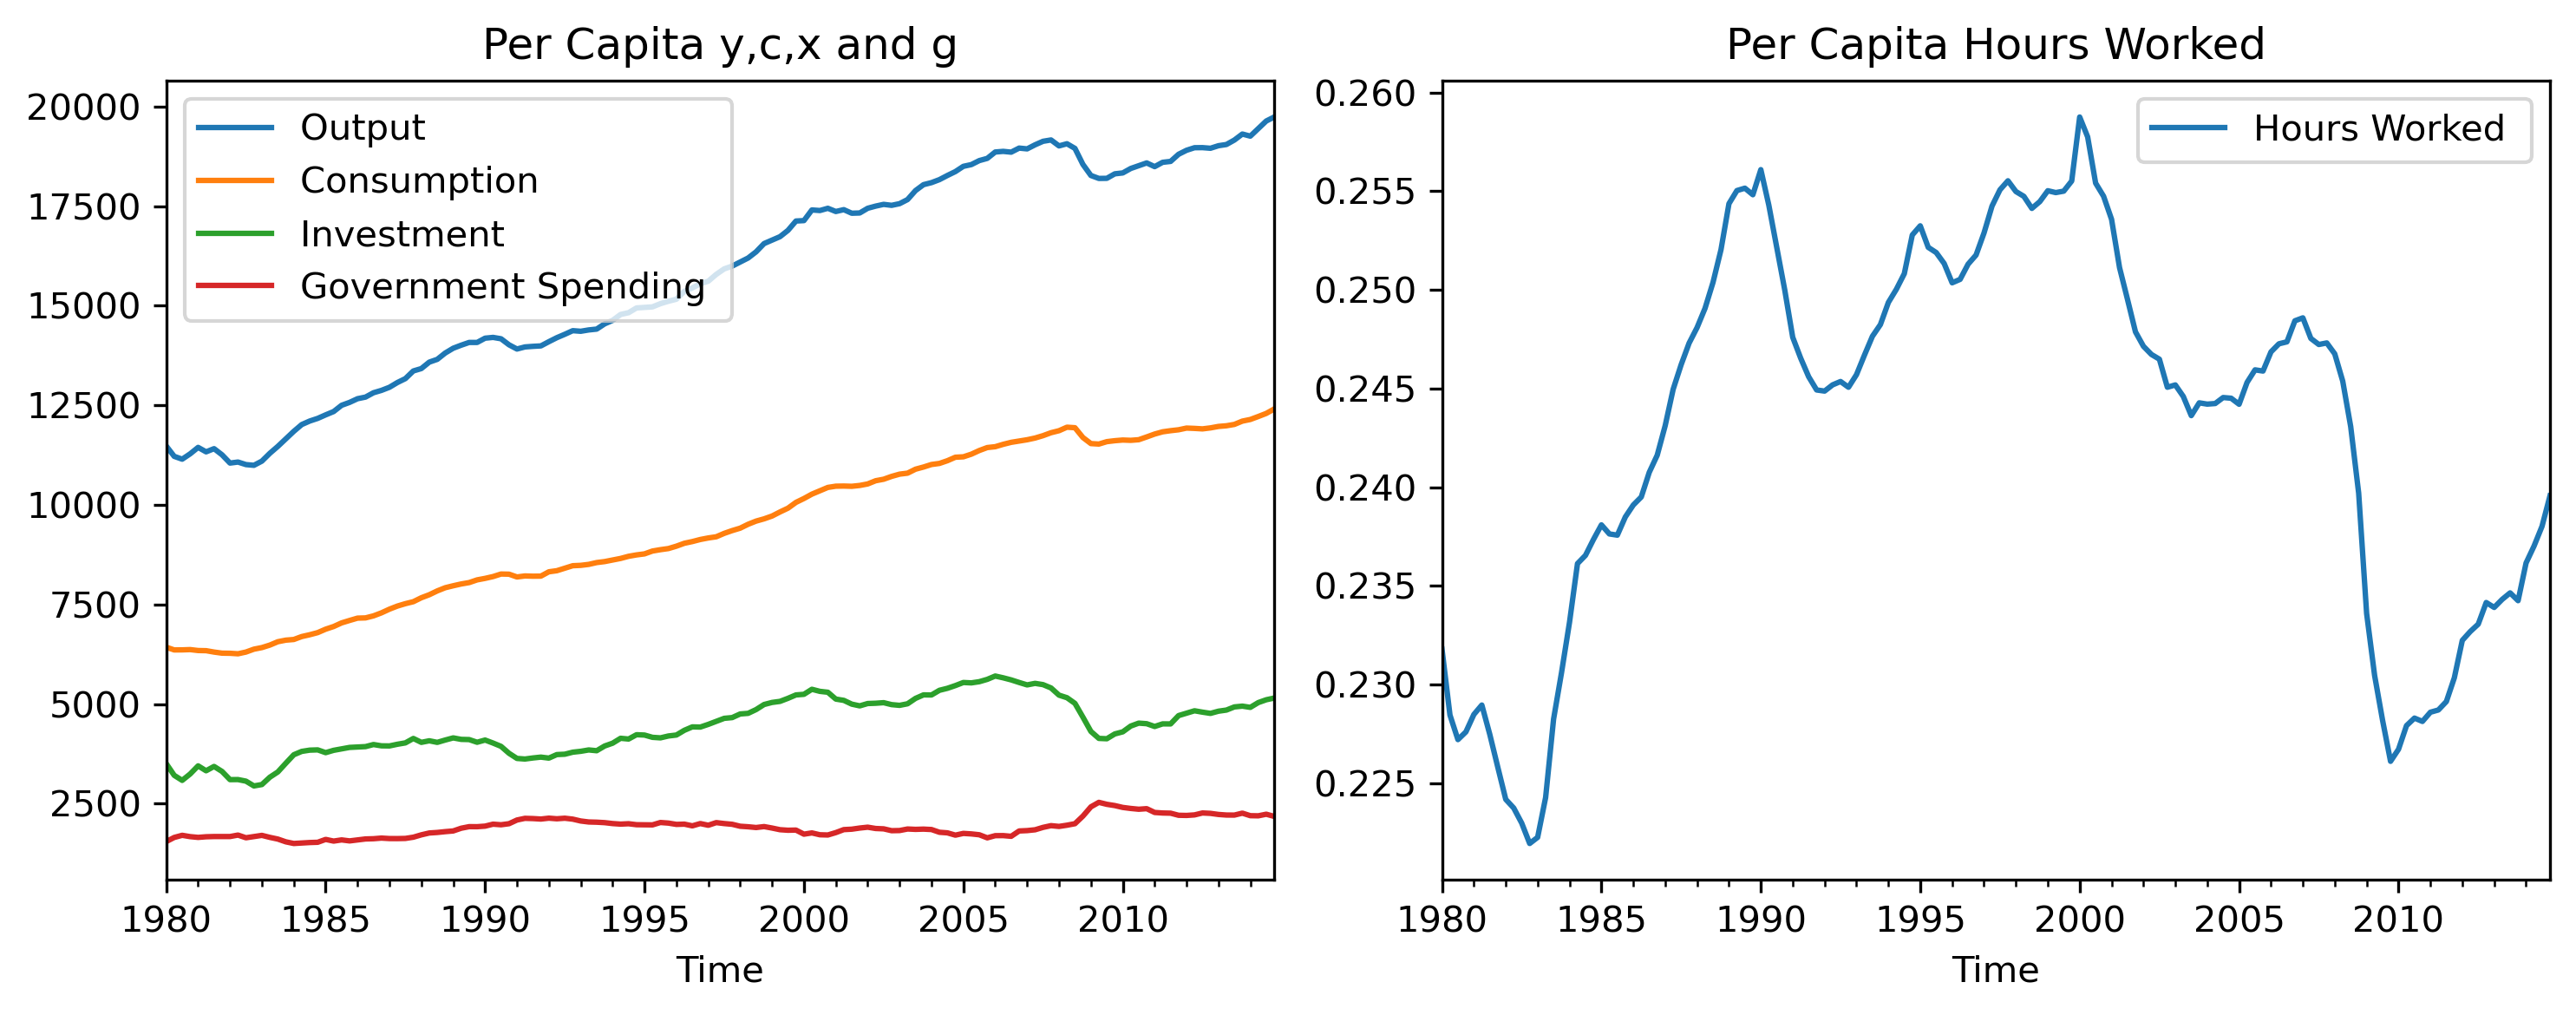

In [6]:
# Create a start date for the time series and the time series to the data_pc
start = pd.Timestamp('1980-01-01')
end = start + pd.offsets.QuarterEnd(len(data_pc))
dates = pd.date_range(start, end, freq='Q')
data_pc['Time'] = dates

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=300, sharex=True)

# Plot per capita output and consumption on the first subplot
data_pc.plot(x='Time', y='ypc', ax=axes[0], title='Per Capita y,c,x and g', label='Output ')
data_pc.plot(x='Time', y='cpc', ax=axes[0], label='Consumption ')
data_pc.plot(x='Time', y='xpc', ax=axes[0], label='Investment ')
data_pc.plot(x='Time', y='gpc', ax=axes[0], label='Government Spending ')
axes[0].legend()

# Plot per capita hours worked on the second subplot
data_pc.plot(x='Time', y='hpc', ax=axes[1], title='Per Capita Hours Worked', label='Hours Worked ')
axes[1].legend()

# Adjust the layout of the subplots
plt.tight_layout()
plt.savefig(r'/Users/9527document/Desktop/论文/Network Accounting/Business cycle accounting/Replicate figures/raw_data.png')
plt.show()

The figure above indicates an long lasting growth in output, consumption, investment, government expenditure and hours per capita, which is typical of long-term economic expansion. However, marked declines during the early 1980s and the 2008 financial crisis highlight the susceptibility of these indicators to economic recessions. Consumption and government spending show resilience, with a steadier ascent, although consumption levels off around the 2008 downturn. Investment is the most volatile, with pronounced spikes and troughs aligning with economic cycles, suggesting higher sensitivity to market conditions. 

In [7]:
data_pc

,ypc,xpc,hpc,gpc,cpc,iP,Time
0,11479.258120,3504.702818,0.231798,1546.840631,6427.714670,1.506881e+08,1980-03-31
1,11219.512049,3210.088836,0.228459,1650.400500,6359.022713,1.511357e+08,1980-06-30
2,11148.368875,3083.554844,0.227214,1704.350991,6360.463040,1.515703e+08,1980-09-30
3,11282.682642,3244.214605,0.227605,1671.069905,6367.398133,1.519917e+08,1980-12-31
4,11444.268609,3448.235813,0.228488,1652.020393,6344.012403,1.524001e+08,1981-03-31
...,...,...,...,...,...,...,...
135,19312.342575,4947.710466,0.234251,2260.549004,12104.083106,2.115459e+08,2013-12-31
136,19259.256907,4916.862533,0.236161,2197.094345,12145.300029,2.116888e+08,2014-03-31
137,19450.681541,5037.037857,0.237020,2193.739432,12219.904252,2.117807e+08,2014-06-30
138,19639.440778,5107.746179,0.238018,2234.185665,12297.508934,2.118111e+08,2014-09-30


## 2.3 Detrending Data
### Linear Trend
The detrending aims to remove trends from economic time series data, allowing for a clearer analysis of cyclical terms. Here we assume the output has a linear trend and preserve the cylical compoent of any frequency. 

 \begin{align*}
        y_t &= y_0 (1+g)^t e^{\varepsilon_t} 
        \\ \Rightarrow
        \log y_t &= \log y_0 + t \log (1+g) + \varepsilon_t 
    \end{align*}
    Where we set base year output per-capita as $y_0$, $\varepsilon_t $ is a mean zero and stationary error term.

### Detrending Process Explanation

#### 1. `calgz` Function

#### Steps:
1. Extract a subset ($y$) from the whole time series for MLE estimation.
2. Calculate the log-transformed detrended data ($ \log y_t^{cyclical}$) using the guessed growth rate ($g$).

   $ \log y_t^{cyclical} = \log y_t - \log y_{base} - (t-base)\log (1+g)  $

3. compute $\mathbb{E}(\log y_t^{cyclical})$, eusuring detrended log output is mean zero over the sample period.

#### 2. `maketrend` Function

#### Steps:
1. Use `fsolve` to find the growth rate (`gzt`) that makes `calgz` return a mean zero of detrended log output
2. Create detrended and normalized economic variables.(`mled`).
$$
y_t^{cyclical} =  \frac{y(t)}{y(base)(1+gzt)^{t-base}} $$
3. Calculate log differences of detrended variables (`Y`), which denotes the aggregate fluctuation of raw data. 


In [8]:
# Data Detrend 
from scipy.optimize import fsolve
#  choose MLE and data transformation parameters
start_year = 1980.25 #  Assuming t is already defined as shown earlier:
end_year   = 2015
t          = np.arange(start_year, end_year + 0.01, 0.25)  # Ensure the end year is included.
bdate      = 2008.25      # Define the base date and find its index
bind       = np.where(t == bdate)[0][0]  
mlestart   = 1980.25    # Define the start and end date for the MLE estimation and find their indices
mleend     = 2015
iobs       = np.where(t == mlestart)[0][0]  # Index of the MLE start
eobs       = np.where(t == mleend)[0][0]    # Index of the MLE end
mlep       = [iobs, eobs]  # Stack the initial and end index of MLE sample


def calgz(ggz, yy, by, mles, mlee):
    ''' Inputs
          ggz: Initial guessed growth rate.
          yy: Time series slice used for Maximum Likelihood Estimation (MLE).
          by: Initial time, representing the base period for the entire economy.
          mles: MLE start index.
          mlee: MLE end index.
        Output
          mY: The mean of the log-transformed detrended data.
    ''' 
    nypc = yy[mles:mlee+1]
    T = len(nypc)
    Y =np.log(nypc) - np.log(nypc[by - mles])  - (np.arange(T) - ( by - mles+1 ))*np.log((1 + ggz))
    #Y = np.log(nypc * (1 + ggz)**(by - mles + 1)) - \
     #   np.log(nypc[by - mles]) - np.log((1 + ggz)**np.arange(T))
    mY = np.mean(Y)
    
    return mY

def maketrend(t, ypc, xpc, hpc, gpc, cpc, bind, mlep):
    ''' Inputs
     t: Time array.
     ypc, xpc, hpc, gpc, cpc:  Various economic variables.
     bind : Index of the base date.
     mlep: List containing MLE start and end indices.
     Outputs 
     mled: Detrended economic variables.
     Y: Log differences of detrended variables.
     gz: Final growth rate trend.
    '''
    T = len(ypc)
    # Set global variables for calgz function
    global yy, by, mles, mlee  
    yy = ypc
    by = bind
    mles, mlee = mlep   

    gzt = fsolve(calgz, 0, args=(yy, by, mles, mlee))[0]    # Solve for gzt using the fsolve function

    # Calculate implied consumption and make a detrended array
    cpci = ypc - xpc - gpc
    base_ypc = ypc[by]  #  The ypc value at the base date
    factor = (1 + gzt) ** (by+1)
    
    # Normalize and detrend the variables
    mled = np.column_stack((t, ypc/base_ypc*factor, xpc/base_ypc*factor,
                            hpc, gpc/base_ypc*factor, cpc/base_ypc*factor, cpci/base_ypc*factor))

    # Calculate Y with the log difference
    g_vec = np.log((1 + gzt) ** np.arange(T)) 
    g_matrix = np.tile(g_vec, (6, 1)).T
    g_matrix[:, 2] = 0  # third column should be zeros as log(1) = 0
    
    Y = np.log(mled[:, 1:]) -  g_matrix

    return mled, Y, gzt

mled, Y, gz = maketrend(t, ypc, xpc, hpc, gpc, cpc, bind, mlep)


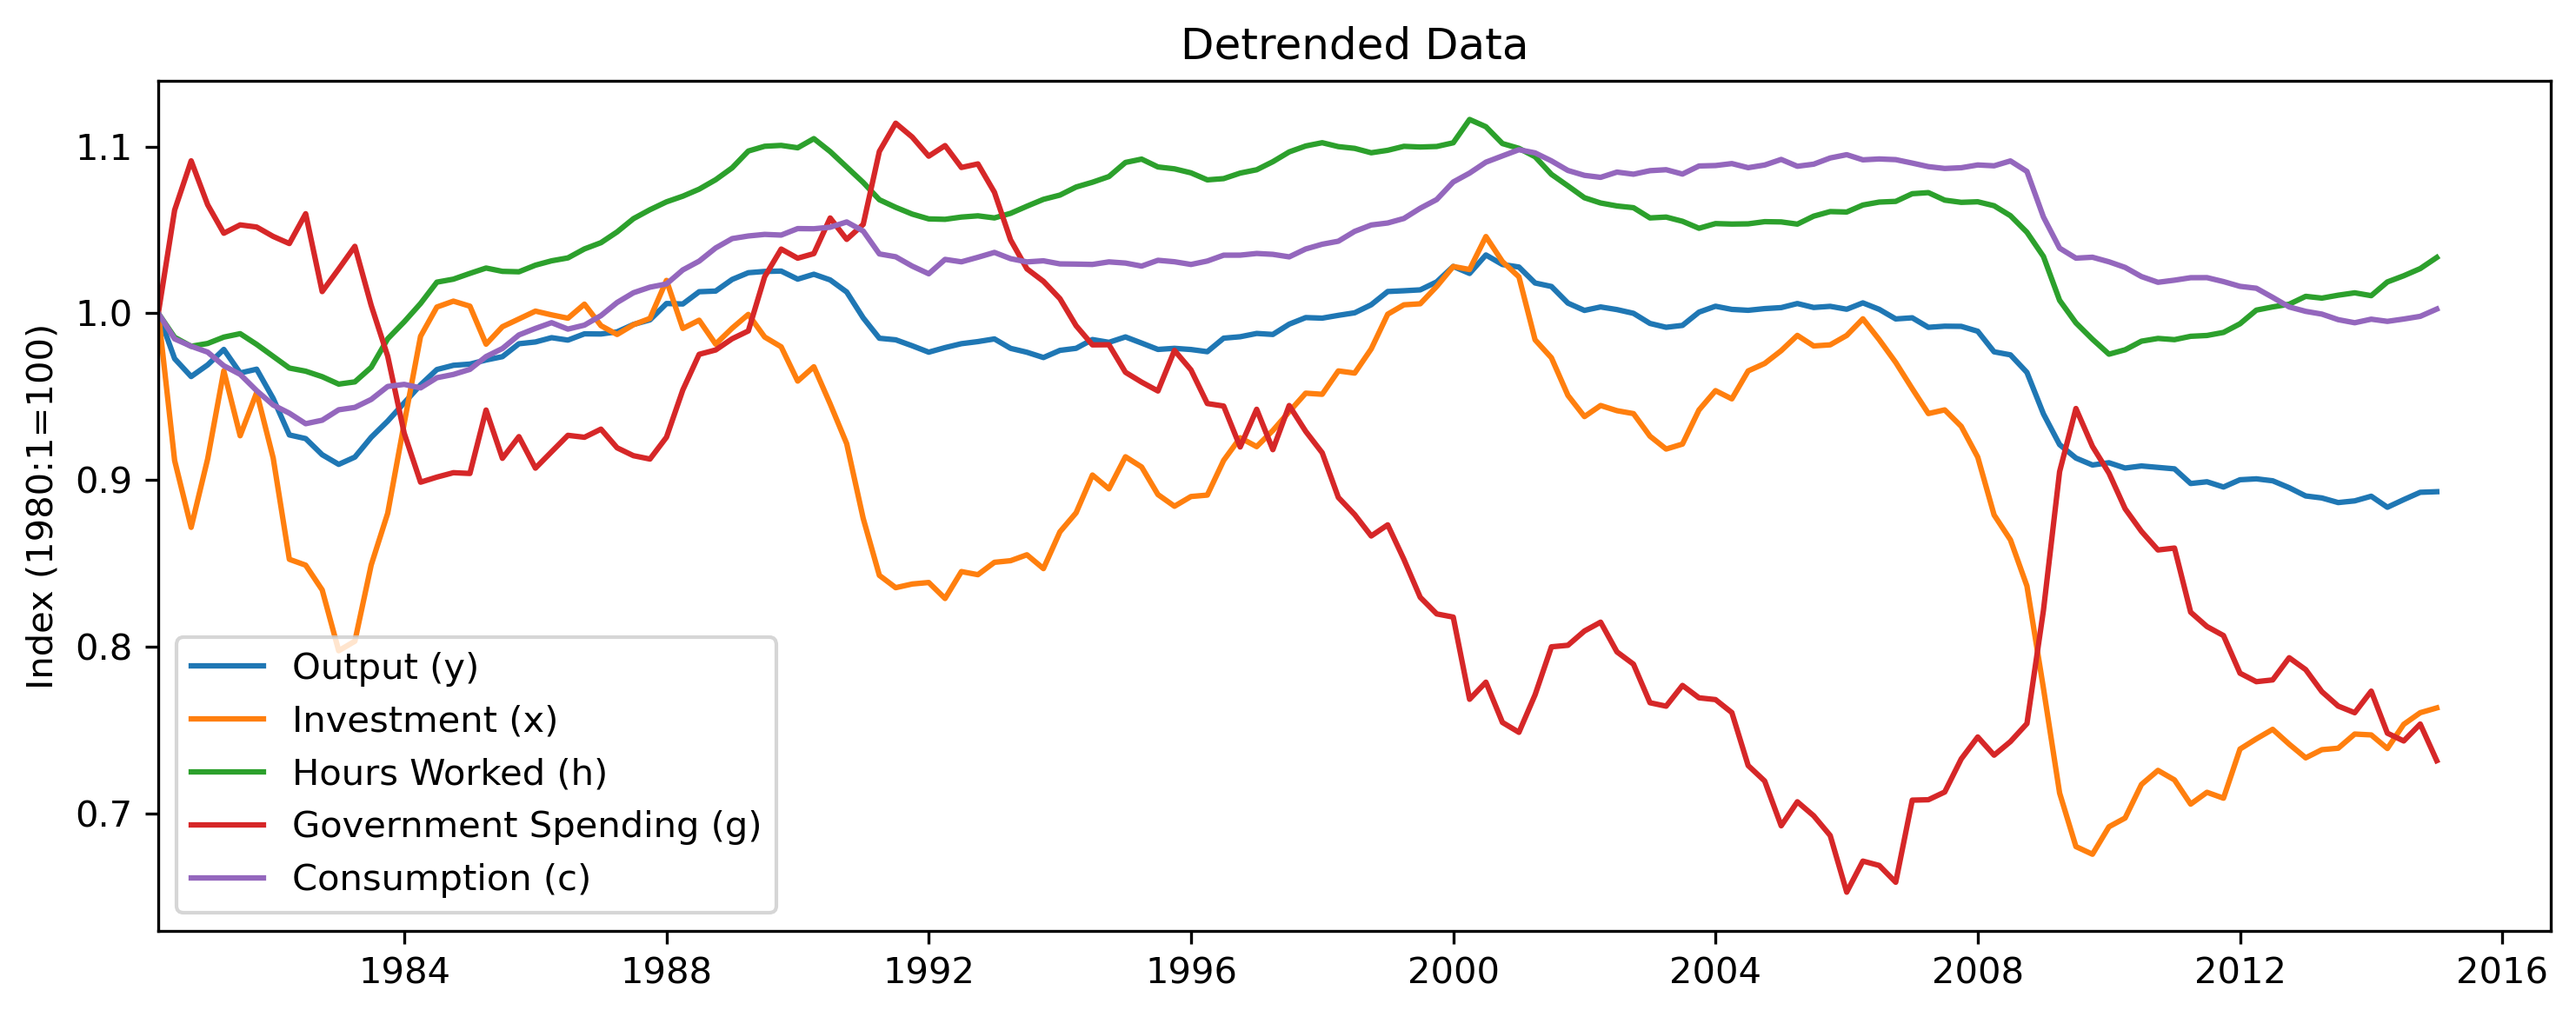

In [11]:
# Combine all per capita data and level data into a DataFrame for analysis and visualization
data_Y = pd.DataFrame(np.exp(Y[:, :-1]), columns=['y', 'x', 'h', 'g', 'c'])
data_Y['Time'] = dates

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

# Plot per capita output, investment, hours worked, government spending, and consumption
ax.plot(data_Y['Time'], data_Y['y'] / data_Y.loc[0, 'y'], label='Output (y)')
ax.plot(data_Y['Time'], data_Y['x'] / data_Y.loc[0, 'x'], label='Investment (x)')
ax.plot(data_Y['Time'], data_Y['h'] / data_Y.loc[0, 'h'], label='Hours Worked (h)')
ax.plot(data_Y['Time'], data_Y['g'] / data_Y.loc[0, 'g'], label='Government Spending (g)')
ax.plot(data_Y['Time'], data_Y['c'] / data_Y.loc[0, 'c'], label='Consumption (c)')

# Setting the title and labels
ax.set_title('Detrended Data')
ax.set_ylabel('Index (1980:1=100)')
ax.set_xlim(data_Y['Time'][0])
# Display legend
ax.legend()

# Adjust the layout
plt.tight_layout()
plt.savefig(r'/Users/9527document/Desktop/论文/Network Accounting/Business cycle accounting/Replicate figures/Detrended_data.png')
plt.show()

In [12]:
data_Y

,y,x,h,g,c,Time
0,1.028487,0.314005,0.231798,0.138590,0.575893,1980-03-31
1,1.000487,0.286256,0.228459,0.147173,0.567058,1980-06-30
2,0.989467,0.273679,0.227214,0.151269,0.564519,1980-09-30
3,0.996678,0.286584,0.227605,0.147617,0.562477,1980-12-31
4,1.006197,0.303174,0.228488,0.145248,0.557775,1981-03-31
...,...,...,...,...,...,...
135,0.915613,0.234575,0.234251,0.107174,0.573864,2013-12-31
136,0.908802,0.232016,0.236161,0.103676,0.573110,2014-03-31
137,0.913518,0.236569,0.237020,0.103031,0.573918,2014-06-30
138,0.918045,0.238761,0.238018,0.104437,0.574846,2014-09-30


## Another Perspective: HP Filter

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycles = {}
trends = {}
# DataFrame to store HP filter cycle components
data_pc_HP = pd.DataFrame()


for var_name, series in zip(['y', 'h', 'x', 'g', 'c'], [ypc, hpc, xpc, gpc, cpc]):
    log_series = np.log(series.astype('float'))

    # Apply the HP filter
    cycle, trend = hpfilter(log_series, lamb=1600)  # The default lambda=1600 is appropriate for quarterly data

    cycles[var_name] = np.exp(cycle)  # If you want to store the cycle component
    trends[var_name] = np.exp(trend) 

# Convert the trends dictionary to a DataFrame
data_pc_HP = pd.DataFrame(cycles)
data_pc_HP['Time']  = dates

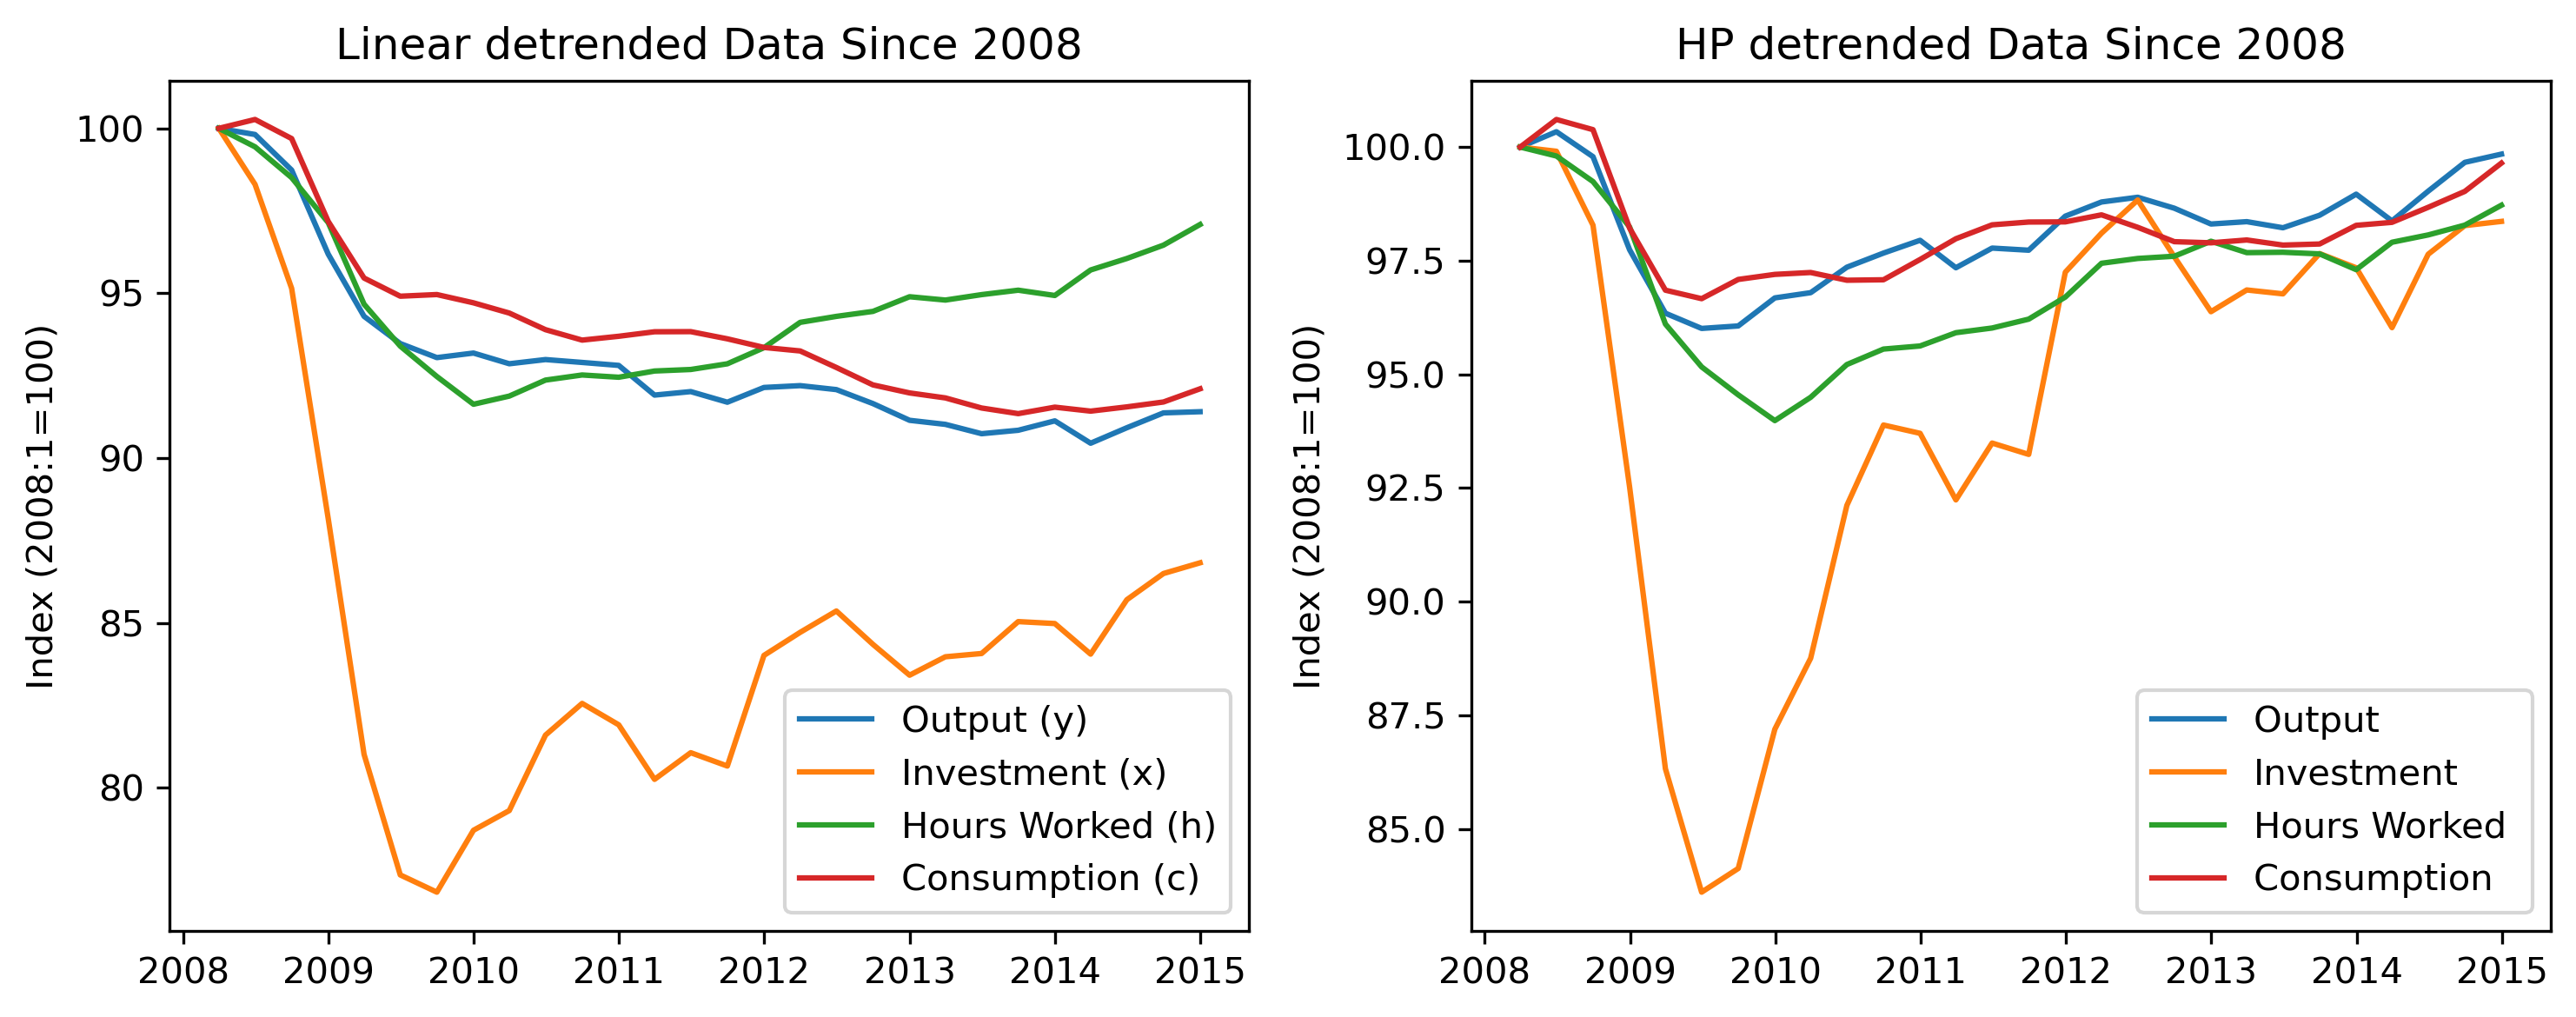

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

# Plot per capita output and consumption on the first subplot starting from 2008
t0_Y = data_Y[data_Y['Time'].dt.year >= 2008].index[0]  # Index for the first quarter of 2008 in data_Y
axes[0].plot(data_Y.loc[t0_Y:, 'Time'], data_Y.loc[t0_Y:, 'y'] / data_Y.loc[t0_Y, 'y'] *100, label='Output (y)')
axes[0].plot(data_Y.loc[t0_Y:, 'Time'], data_Y.loc[t0_Y:, 'x'] / data_Y.loc[t0_Y, 'x']*100, label='Investment (x)')
axes[0].plot(data_Y.loc[t0_Y:, 'Time'], data_Y.loc[t0_Y:, 'h'] / data_Y.loc[t0_Y, 'h']*100, label='Hours Worked (h)')
axes[0].plot(data_Y.loc[t0_Y:, 'Time'], data_Y.loc[t0_Y:, 'c'] / data_Y.loc[t0_Y, 'c']*100, label='Consumption (c)')
axes[0].set_title('Linear detrended Data Since 2008')
axes[0].set_ylabel('Index (2008:1=100)')
axes[0].legend()

# Plot HP filter trend components on the second subplot starting from 2008
t0_HP = data_pc_HP[data_pc_HP['Time'].dt.year >= 2008].index[0]  # Index for the first quarter of 2008 in data_HP_trends
axes[1].plot(data_pc_HP.loc[t0_HP:, 'Time'], data_pc_HP.loc[t0_HP:, 'y'] / data_pc_HP.loc[t0_HP, 'y']*100, label='Output ')
axes[1].plot(data_pc_HP.loc[t0_HP:, 'Time'], data_pc_HP.loc[t0_HP:, 'x'] / data_pc_HP.loc[t0_HP, 'x']*100, label='Investment')
axes[1].plot(data_pc_HP.loc[t0_HP:, 'Time'], data_pc_HP.loc[t0_HP:, 'h'] / data_pc_HP.loc[t0_HP, 'h']*100, label='Hours Worked ')
axes[1].plot(data_pc_HP.loc[t0_HP:, 'Time'], data_pc_HP.loc[t0_HP:, 'c'] / data_pc_HP.loc[t0_HP, 'c']*100, label='Consumption ')
axes[1].set_title('HP detrended Data Since 2008')
axes[1].set_ylabel('Index (2008:1=100)')
axes[1].legend()

# Adjust the layout of the subplots
plt.tight_layout()
plt.savefig(r'/Users/9527document/Desktop/论文/Network Accounting/Business cycle accounting/Replicate figures/Filter_comparison.png')
plt.show()

## 3 Accounting Wedges 
### 3.1 Calibration 
&emsp;&emsp;  To apply our accounting procedure, we use functional forms and parameter values that are familiar from the business cycle literature. We assume that the production function has the form $F(k,l) = k^\alpha l ^{1-\alpha}$, and the utility function is $u(c,l) = log c + \psi log(1-l)$. Following the literature, We choose the capital share $\alpha$ of one-third 
and the time allocation parameter $\psi$ of 2.5. We choose the depreciation rate $\delta$ of $5\%$, the discount factor $\beta$ of $0.975$, technology growth rates $\gamma$ of  $1.9\%$ and population growth rate $\gamma_n$ of  $2.5\%$, all annualized basis. The adjustment cost parameter $b=\delta+\gamma+\gamma_n$ is pinned down by the previous parameters. For the adjustment cost parameter $a$, we follow Bernanke et al. (1999) in choosing this parameter so that the elasticity, $\eta$, of the price of capital with respect to the investment-capital ratio is $0.25$ . In this setup, the price of capital $q=1/(1-\phi^{\prime})$, so that, evaluated at the steady state, $\eta=ab.$ Given $\eta$ and $b$, we then set $a$ accordingly.



In [14]:
# 1. Calculate the stationary levels
ys      = np.mean(np.exp(Y[:,0]))
xs      = np.mean(np.exp(Y[:,1]))
hs      = np.mean(np.exp(Y[:,2]))
gwedges = np.mean(np.exp(Y[:,3]))
cs      = np.mean(np.exp(Y[:,4]))

#2. Set fixed parameters

delta      = 1 - (1 - 0.05) ** (1 / 4)  # Depreciation rate
delt1      = 1 - delta
beta       = 0.975**(1/4)  # Quarterly discount factor
eta        = (iP[-1] / iP[0]) ** (1 / (len(ypc) - 1)) - 1  # Quarterly population growth rate 
gamma      = gz    # Quarterly technology growth rate 
sigma      = 1.000001  # Coefficient of relative risk aversion
lwedges    = 1     # Labor wedge, set to 1 as a placeholder
xwedges    = 1     # Investment wedge, set to 1 as a placeholder
bhat       = beta*(1+gamma)**(-sigma) # Adjusted discount factor
grate      = (1+eta)*(1+gamma)   # Growth rate of the economy

# 3. Calculate implied parameters

ks      =    xs / (delta + grate - 1)  # Capital stock
theta   =    1 / 3     # Capital share in income
thet1   =    1 - theta
psi     =    2.5       # Frisch elasticity of labor supply lwedges*(1-theta)*(1-hs)*ys/(cs*hs)
ewedges =    ys / (ks ** theta * hs ** thet1)  # Efficiency wedges
adjb    =    eta + gamma + delta
adja    =    0.25 / adjb  # Adjustment cost parameter
gdps    =    ys

In [15]:
gamma,eta

(0.004725592585603176, 0.002451103199625715)

## 3.2 Accounting Procedure
From the functional form of preference and technology, we derive the following equilibrium condition to calculate 4 wedges 

\begin{align*}
y_t(s^t)&=A_t(s^t)k_t^\alpha(s^{t-1})l_t^{1-\alpha}(s^t)  & \text{Efficient wedge}\\
    y_t(s^t) & = c_t(s^t)+x_t(s^t)+g_t(s^t) & \text{Government consumption wedge}  \\ 
   \psi \frac{c_t(s^t)}{1-l_t(s^t)} &= (1-\tau_{lt}) (1-\alpha) \frac{y_t(s^t)}{l_t(s^t)}  & \text{Labor wedge} \\
    \frac{1+\tau_{xt}}{c_t(s^t)(1-\phi'(\frac{x_t(s^t)}{k_t(s^{t-1})}))} &= \frac{\beta}{1+\gamma}\mathbb{E}_t [\frac{1}{c_{t+1}(s^{t+1})}(\alpha \frac{y_{t+1}(s^{t+1})}{k_{t+1}(s^t)}  + \frac{1+\tau_{xt+1}}{1-\phi'(\frac{x_{t+1}(s^{t+1})}{k_{t+1}(s^{t})})}  \\ &(1-\delta + \phi'(\frac{x_{t+1}(s^{t+1})}{k_{t+1}(s^{t})}) \frac{x_{t+1}(s^{t+1})}{k_{t+1}(s^t)} - \phi(\frac{x_{t+1}(s^{t+1})}{k_{t+1}(s^t)}))) ] &\text{Investment wedge}
\end{align*}
We need to assume that the initial value of investment wedge. The result shows that time series of investment wedge is very sensitive to its initial value

In [30]:
t0 = 112 ;tT = 140
y        = np.exp(Y[t0:tT,0])
x        = np.exp(Y[t0:tT,1])
h        = np.exp(Y[t0:tT,2])
g_wedge  = np.exp(Y[t0:tT,3])
c        = np.exp(Y[t0:tT,4])

T = tT - t0   # Calculate the total number of time points

# Initialize the capital stock (k) and next period's capital stock (kn)
k = np.zeros(T)+ks  
kn = np.copy(k)  
phi = np.zeros(T)  # Initialize the capital adjustment cost array

# Calculate wedges
for i in range(T-1):
    phi[i] = adja * (x[i] / k[i] - adjb) ** 2 / 2  # Capital adjustment cost
    kn[i] = (delt1 * k[i] + x[i] - phi[i] * k[i]) / grate  # Next period's capital stock
    k[i+1] = kn[i]
phi[-1] = adja * (x[-1] / k[-1] - adjb) ** 2 / 2
kn[-1] = (delt1 * k[-1] + x[-1] - phi[-1] * k[-1]) / grate

ewedge = y / (k ** theta * h ** thet1)   # Efficiency wedge
lwedge = psi * c * h / (thet1 * y * (1 - h))   # Labor wedge
uc     = c ** (-sigma) * (1 - h) ** (psi * (1 - sigma))  # Marginal utility of consumption
r      = theta * y / k   # Return on capital
dphi   = adja * (x / k - adjb)  # Derivative of phi
xwedge = np.ones(T)

for i in range(T-1):
     # Calculate the adjustment for the next period's investment
    dtem = (delt1 - phi[i+1] + dphi[i+1] * x[i+1] / k[i+1]) / (1 - dphi[i+1])

    # Update the investment wedge for the next period
    xwedge[i+1] = (bhat * uc[i+1] * dtem) / (uc[i] / (xwedge[i] * (1 - dphi[i])) - bhat * uc[i+1] * r[i+1])

# Combine all per capita data and level data into a DataFrame for analysis and visualization
data_wedge          = pd.DataFrame({'ewedge':ewedge,'lwedge':lwedge,'xwedge':xwedge,'gwedge':g_wedge})
data_wedge['Time']  = dates[t0:tT]

In [31]:
data_wedge

,ewedge,lwedge,xwedge,gwedge,Time
0,1.054592,0.766457,1.000000,0.101848,2008-03-31
1,1.056749,0.764241,0.992922,0.102977,2008-06-30
2,1.052212,0.758594,0.990656,0.104475,2008-09-30
3,1.035110,0.745230,0.998840,0.113897,2008-12-31
4,1.033374,0.721912,0.999159,0.125425,2009-03-31
5,1.035047,0.711451,0.995813,0.130675,2009-06-30
6,1.038846,0.705944,0.993517,0.127524,2009-09-30
7,1.048452,0.694774,1.000272,0.125302,2009-12-31
8,1.044462,0.697346,1.004749,0.122338,2010-03-31
9,1.043696,0.697414,1.015776,0.120456,2010-06-30


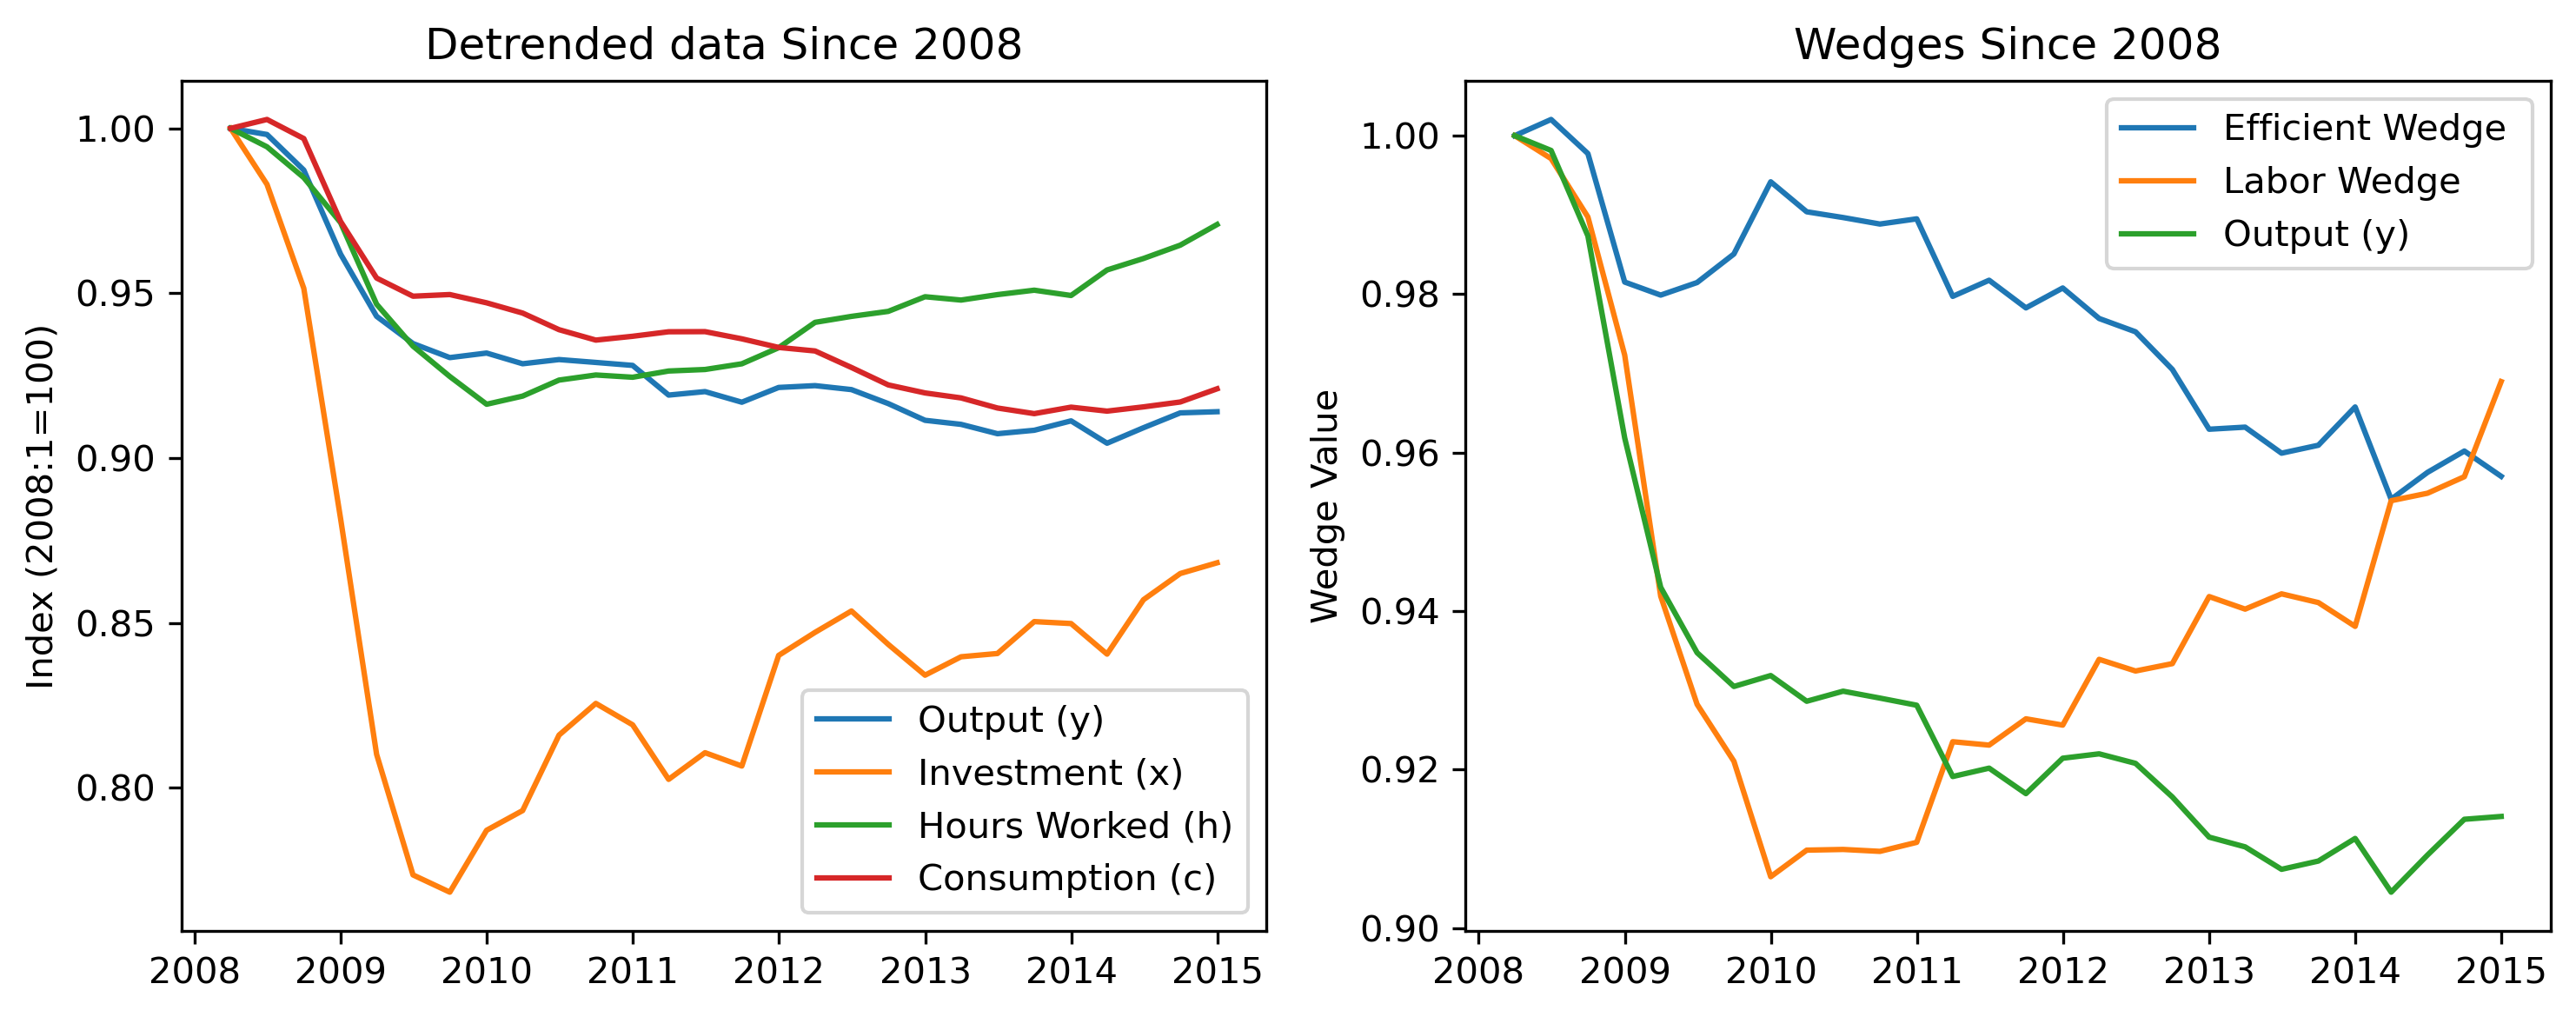

In [32]:



fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

# Plot per capita output and consumption on the second subplot starting from 2008
t0 = data_Y[data_Y['Time'].dt.year >= 2008].index[0]  # index for the first quarter of 2008
axes[0].plot(data_Y.loc[t0:, 'Time'], data_Y.loc[t0:, 'y'] / data_Y.loc[t0, 'y'], label='Output (y)')
axes[0].plot(data_Y.loc[t0:, 'Time'], data_Y.loc[t0:, 'x'] / data_Y.loc[t0, 'x'], label='Investment (x)')
axes[0].plot(data_Y.loc[t0:, 'Time'], data_Y.loc[t0:, 'h'] / data_Y.loc[t0, 'h'], label='Hours Worked (h)')
axes[0].plot(data_Y.loc[t0:, 'Time'],  data_Y.loc[t0:, 'c'] / data_Y.loc[t0, 'c'], label='Consumption (c)')
axes[0].set_title('Detrended data Since 2008')
axes[0].set_ylabel('Index (2008:1=100)')
axes[0].legend()


# Plot the wedges on the second subplot starting from 2008
axes[1].plot(data_wedge['Time'], data_wedge['ewedge']/data_wedge.loc[0,'ewedge'], label='Efficient Wedge ')
axes[1].plot(data_wedge['Time'], data_wedge['lwedge']/data_wedge.loc[0,'lwedge'], label='Labor Wedge')
#axes[1].plot(data_wedge['Time'], data_wedge['gwedge']/data_wedge.loc[0,'gwedge'], label='Government Spending Wedge')
axes[1].plot(data_Y.loc[t0:tT, 'Time'], data_Y.loc[t0:tT, 'y'] / data_Y.loc[t0, 'y'], label='Output (y)')
axes[1].set_title('Wedges Since 2008')
axes[1].set_ylabel('Wedge Value')
axes[1].legend()

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [29]:
data_wedge

data_wedge['Time'] = data_wedge['Time'].astype(str)
filtered_data = data_wedge[data_wedge['Time'].str.endswith('12-31')]
filtered_data.to_excel(r'/Users/9527document/python code /Mypaper /Dynamic Production Network Accounting /数据处理/aggregate_wedge.xlsx', index=False)

In [24]:
filtered_data

,ewedge,lwedge,xwedge,gwedge,Time
3,1.103445,0.623624,0.996252,0.147617,1980-12-31
7,1.085053,0.609937,1.028479,0.144983,1981-12-31
11,1.053208,0.620572,0.994795,0.142276,1982-12-31
15,1.070488,0.636747,1.012935,0.128614,1983-12-31
19,1.073300,0.651361,1.021702,0.125273,1984-12-31
23,1.081805,0.663059,0.991444,0.125716,1985-12-31
27,1.074977,0.676459,0.976250,0.128958,1986-12-31
31,1.075798,0.697939,0.958712,0.128286,1987-12-31
35,1.075384,0.724521,0.918396,0.136475,1988-12-31
39,1.065951,0.739364,0.896444,0.143172,1989-12-31


In the right figure, we see that the efficiency wedge and investment wedge fell very modestly by only about $1\%$ from 2008:1 to 2009:3. However, the labor wedge worsened dramatically by about 8%. We can see that the labor wedge play the most important role in accounting for the downturn. Overall, considering the period from 2008 until the end of 2011, these results imply that the Great Recession in the United States should be thought of as primarily a labor wedge recession.

## 4. A Markovian Implementation


&emsp;&emsp; Here, we describe a set of assumptions that estimate $s^t$ more easily, We assume that the state s$^{t}$ follows a Markov process $\pi(s_t|s_{t-1})$ and that the wedges in period $t$ can be used to uniquely uncover the event $s_t$, in the sense that the mapping from the event $s_t$ to the wedges $(A_t,\tau_{lt},\tau_{\chi t},g_t)$ is one to one and onto. Given this assumption, let the underlying event $s_t=(s_{At},s_{lt},s_{\chi t},s_{gt})$, and let $A_t(s^t)= s_{At}, \tau_{lt}( s^t) = s_{lt}, \tau_{xt}( s^t) = s_{xt}, $ and $g_t( s^t) = s_{gt}.$ Note that we have effectively assumed that agents use only past wedges to forecast future wedges and that the wedges in period $t$ are sufficient statistics for the event in period $t$. 




&emsp;&emsp; In practice, to estimate the stochastic process for the state, we first specify a vector autoregressive AR(1) process for the event $s_t = (s_{At}, s_{lt}, s_{xt}, s_{gt})$ of the form
$$s_{t+1}=P_0+Ps_t+\varepsilon_{t+1},$$
where the shock $\varepsilon_t$ is i.i.d. over time and is distributed normally with mean zero and covariance matrix $V.$ To ensure that our estimate of $V$ is positive semidefinite, we estimate the lower triangular matrix Q, where $V=QQ^{\prime}.$

In [25]:
A_wedge = data_wedge['ewedge']/data_wedge.loc[0,'ewedge']
L_wedge = data_wedge['lwedge']/data_wedge.loc[0,'lwedge']
I_wedge = data_wedge['xwedge']/data_wedge.loc[0,'xwedge']
G_wedge = data_wedge['gwedge']/data_wedge.loc[0,'gwedge']

from scipy.optimize import minimize
from scipy.linalg import cholesky

# Observations
data = np.column_stack((A_wedge, L_wedge, I_wedge, G_wedge))

# Initial guess
initial_guess = np.zeros(5 * 4 + 4 * 4)  # Include space for flattened W
initial_guess[20:] = np.eye(4).flatten()  # 使用单位矩阵初始化Q的下三角部分

# Log-likelihood function with eps_cov decomposition
def log_likelihood(params):
    Q = params[:4]
    P = params[4:20].reshape((4, 4))
    flattened_W = params[20:]
    W = flattened_W.reshape((4, 4))

    eps_cov = np.dot(W, W.T)  # Decompose eps_cov into W * W^T
    sigma = 1  # Standard deviation

    log_likelihood_value = 0
    for t in range(len(data) - 1):
        st = data[t]
        st1 = data[t + 1]
        epsilon = st1 - Q - np.dot(P, st)
        log_likelihood_value += -0.5 * np.sum(np.linalg.solve(eps_cov, epsilon)**2) - 0.5 * np.log(np.linalg.det(eps_cov))

    return -log_likelihood_value

# Constraint for W to ensure positive definiteness
def positive_definite_constraint(params):
    W = params[20:].reshape((4, 4))
    return np.linalg.eigvals(W).min() - 1e-8  # Ensure eigenvalues are greater than a small positive value

# Maximum Likelihood Estimation
result = minimize(log_likelihood, initial_guess, method='L-BFGS-B', constraints={'type': 'ineq', 'fun': positive_definite_constraint})

# Extract estimated parameters
estimated_params = result.x
estimated_P0 = estimated_params[:4]
estimated_P = estimated_params[4:20].reshape((4, 4))
flattened_W = estimated_params[20:]
estimated_W = flattened_W.reshape((4, 4))
estimated_eps_cov = np.dot(estimated_W, estimated_W.T)

# Display results
print("MLE Estimated (P0):\n", estimated_P0)
print("MLE Estimated (P):\n", estimated_P)
print("MLE Estimated (Q):\n", estimated_W)
print("MLE Estimated (eps_cov):\n", estimated_eps_cov)


/Users/9527document/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


MLE Estimated (P0):
 [0.20901508 0.08466609 0.25416207 0.11127688]
MLE Estimated (P):
 [[ 0.67182075  0.17346551 -0.15238556  0.09272573]
 [ 0.1603717   0.67447485  0.11547874 -0.05130932]
 [-0.10769353 -0.05063046  0.92931368 -0.02367988]
 [ 0.12199267  0.20778525 -0.00657096  0.6308909 ]]
MLE Estimated (Q):
 [[ 0.06156363 -0.02822048 -0.02050623 -0.05578493]
 [ 0.00502561  0.08182988  0.01777829 -0.00476581]
 [ 0.00032512 -0.04701861  0.06048961 -0.00843223]
 [ 0.04105723 -0.09665516 -0.02063924  0.29197383]]
MLE Estimated (eps_cov):
 [[ 0.00811894 -0.00209859  0.00057688 -0.01060922]
 [-0.00209859  0.00706017 -0.00273031 -0.00946136]
 [ 0.00057688 -0.00273031  0.00594095  0.00084749]
 [-0.01060922 -0.00946136  0.00084749  0.09670261]]


The table above displays the resulting estimated values for the parameters of the coefficient matrices, P and Q.

## Personal contribution summary and group member attestation

## Yichen Zheng, Jiaqi He 

#### 1 My Contribution(Yichen Zheng):

(1) summerize the model detail and collect data 

(2) write codes and the note to account 4 wedges

#### 2 Rating of my teamates: 5 

**I really appreciate Prof Thomas, Prof Spencer and Prof Chase for this enjoyable course in PHBS this semester. Since I am interested in the macro, those materials in course are really beneficial for my research and further study ~**